In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install keras-tuner
!pip install tensorboard
!pip install scikit-learn
!pip install -U tensorboardcolab
import tensorboardcolab as tb
import tensorboard
import kerastuner as kt
import os
import cv2
import random
import time
import numpy as np
import pickle
import h5py
import keras
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import tensorflow as tf
tbc=tb.TensorBoardColab()

     |████████████████████████████████| 61kB 2.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=f23dedf8fd73c420d1f0912b04cb4e55e913e9ffb4fd558e087f189b62a8da2b
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=ec320d914d13ea33305c0978cf75e8358aa64ee3a6511e40c57215aadc313b34
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables
Requirement already up-to-date: tensorboardcolab in /usr/local/lib/python3.6/dist-packages (0.0.22)


Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://734158fc.ngrok.io


In [0]:
DATADIR = "facesYeni"
IMG_SIZE = 128
CATEGORIES = ["Akif", "Ali", "Ela", "Fatih", "Furkan"]
num_classes = 5


def create_training_data ():
    training_data = []
    for category in CATEGORIES:
        path = os.path.join ('/content/drive/My Drive/Model',DATADIR, category)
        class_num = CATEGORIES.index (category)
        for img in os.listdir (path):
            try:
                img_array = cv2.imread (os.path.join (path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize (img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append ([new_array, class_num])
            except Exception as e:
                print (e)
                pass
    random.shuffle (training_data)
    return training_data


training_data = create_training_data ()
[training_data, test_data] = train_test_split (training_data)
X = []
y = []

for features, label in training_data:
    X.append (features)
    y.append (label)
X_test = []
y_test = []
for features, label in test_data:
    X_test.append (features)
    y_test.append (label)
X = np.array (X).reshape (-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array (X_test).reshape (-1, IMG_SIZE, IMG_SIZE, 1)


TypeError: ignored

In [0]:

def build_model(hp):
    model=Sequential()
    input_kernel=hp.Choice('input_kernel',[3,5,11])
    input_activation= hp.Choice('input_activation',['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear'])
    input_units=hp.Choice('input_units',[32,64,128,256])
    model.add(Conv2D(input_units,(input_kernel,input_kernel),strides=(1,1),input_shape=(IMG_SIZE,IMG_SIZE,1),activation=input_activation))

    for i in range(hp.Int("Conv_Layer_Groups",min_value=1,max_value=2)):
      for j in range(hp.Int(f'Conv_Layer_Group_{i}_Layers',min_value=1,max_value=2)):
        conv_units=hp.Choice(f'Conv_Group_{i}_Layer_{j}_units',[32,64,128])
        conv_kernel=hp.Choice(f'Conv_Group_{i}_Layer_{j}_kernel',[3,5])
        conv_activation= hp.Choice(f'Conv_Group_{i}_Layer_{j}_activation',['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear'])
        model.add(Conv2D(conv_units,kernel_size=(conv_kernel,conv_kernel),strides=(1,1),activation=conv_activation))
      
      model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    for a in range(hp.Int('Dense_Layers',min_value=1,max_value=2)):
      dense_units=hp.Choice(f'Dense_Layer_{a}_units',[512,1024,2048,4096])
      dense_activation=hp.Choice(f'Dense_Layer_{a}_activation',['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear'])
      model.add(tf.keras.layers.Dense(units=dense_units,activation=dense_activation))
      dropout=hp.Choice(f'Dense_Layer_{a}_dropout',[0,1])
      if dropout==1:
        drop_rate= hp.Choice(f'Dense_Layer_{a}_dropout_droprate',  [ 0.05, 0.1, 0.15, 0.2,0.25, 0.3, 0.35, 0.40, 0.45, 0.50])
        model.add(Dropout(drop_rate))

    model.add(tf.keras.layers.Dense(units=num_classes))
    model.add(Activation('softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print(model.summary())
    return model
  


In [0]:
def CreateModel():
  model=Sequential()
  activation='softsign'
  model.add(Conv2D(32, kernel_size=(5, 5),activation=activation,input_shape=(IMG_SIZE,IMG_SIZE,1)))
  model.add(Conv2D(64, (3, 3), activation=activation))
  model.add(Conv2D(128, (3, 3), activation=activation))
  model.add(Conv2D(256, (3, 3), activation=activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  activation='relu'
  model.add(Dense(256, activation=activation))
  drop= 0.4
  model.add(Dropout(drop))
  model.add(Dense(128, activation=activation))
  model.add(Dropout(drop))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile( optimizer=tf.keras.optimizers.Adamax(learning_rate=0.00012763229197396264 ),  loss= 'sparse_categorical_crossentropy' ,metrics=['accuracy'])
  return model


In [0]:
model=CreateModel()
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001,patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    #tb.TensorBoardColabCallback(tbc)
]

fit=model.fit(X,y,batch_size=10,epochs=50,verbose=1,validation_split=0.10,callbacks=my_callbacks)
test=model.evaluate(X_test,y_test)

Epoch 1/50
7/7 [==============================] - 27s 4s/step - loss: 13.5863 - accuracy: 0.2090 - val_loss: 2.7796 - val_accuracy: 0.2500
Epoch 2/50
7/7 [==============================] - 43s 6s/step - loss: 2.8388 - accuracy: 0.2687 - val_loss: 2.2495 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 46s 7s/step - loss: 2.8685 - accuracy: 0.3881 - val_loss: 1.5400 - val_accuracy: 0.3750
Epoch 4/50
7/7 [==============================] - 42s 6s/step - loss: 2.0318 - accuracy: 0.3582 - val_loss: 1.2292 - val_accuracy: 0.3750
Epoch 5/50
7/7 [==============================] - 47s 7s/step - loss: 1.8008 - accuracy: 0.4478 - val_loss: 1.0866 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 44s 6s/step - loss: 0.8958 - accuracy: 0.6119 - val_loss: 0.7100 - val_accuracy: 0.7500
Epoch 7/50
7/7 [==============================] - 44s 6s/step - loss: 0.7806 - accuracy: 0.6418 - val_loss: 0.7553 - val_accuracy: 1.0000
Epoch 8/50
7/7 [=================

In [0]:
model.load_weights('model.23-0.39.h5')
print(model.evaluate(X_test,y_test))

2/2 [==============================] - 0s 55ms/step - loss: 0.6322 - accuracy: 0.7105
[0.632206380367279, 0.7105262875556946]


In [0]:
model.load_weights('model.24-0.41.h5')
print(model.evaluate(X_test,y_test))

2/2 [==============================] - 0s 55ms/step - loss: 0.6250 - accuracy: 0.7105
[0.6249628663063049, 0.7105262875556946]


In [0]:
model.load_weights('/content/drive/My Drive/Model/mymodel.h5')
print(model.evaluate(X_test,y_test))

2/2 [==============================] - 0s 57ms/step - loss: 0.5863 - accuracy: 0.7368
[0.5862518548965454, 0.7368420958518982]


In [0]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize
pred=binarize(pred)
#en son gittim kendim yazdım


y_pred=model.predict_classes(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         8
           3       0.57      0.80      0.67         5
           4       0.60      0.75      0.67         8

    accuracy                           0.74        38
   macro avg       0.76      0.76      0.74        38
weighted avg       0.77      0.74      0.73        38



In [0]:
np.argmax(y_pred)

181

In [0]:
model.load_weights('model.27-0.42.h5')
print(model.evaluate(X_test,y_test))

OSError: ignored

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model=KerasClassifier(build_fn=CreateModel)
batch_sizes=[10,20,50,100]
epochs=[20]
parameters={'batch_size':batch_sizes,'epochs':epochs}
clf=GridSearchCV(model,parameters,scoring="accuracy",verbose=1,cv=2)
fit=clf.fit(X,y,validation_data=(X_test,y_test))

In [0]:
print("Best: %f using %s" % (fit.best_score_, fit.best_params_))
means=clf.cv_results_['mean_test_score']
params=clf.cv_results_['params']
for mean,params in zip(means,params):
  print(mean,params)

In [0]:
LOG_DIR = f"ActivationTest{int(time.time())}"

tuner = kt.RandomSearch(
    CreateModel,
    objective='val_accuracy',
    max_trials=20,  
    executions_per_trial=1, 
    directory=LOG_DIR)

In [0]:


tuner.search(x=X,
             y=y,
             verbose=1,
             epochs=50,
             batch_size=50,
             callbacks=[earlystop_callback],
             # if you have callbacks like tensorboard, they go here.
             validation_data=(X_test, y_test))#gpu hakkın oldugunda calıstır

In [0]:
tf.keras.models.save_model(model,'mymodel.h5')

In [0]:
import matplotlib.pyplot as plt
# Plot the Loss Curves

plt.subplot(111)
plt.plot(fit.history['loss'], 'r')
plt.plot(fit.history['val_loss'], 'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.savefig('madelfig3')
plt.close()

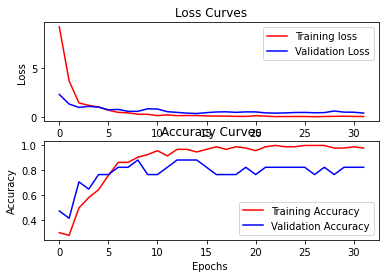

In [0]:

import matplotlib.pyplot as plt
# Plot the Loss Curves

plt.subplot(211)
plt.plot(fit.history['loss'], 'r')
plt.plot(fit.history['val_loss'], 'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')
# Plot the Accuracy Curves
plt.subplot(212)
plt.plot(fit.history['accuracy'], 'r')
plt.plot(fit.history['val_accuracy'], 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.savefig('modelfig')